**Loading the Test Data**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/MajorProject

import cifar10

cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

class_names = cifar10.load_class_names()
images_test, _, labels_test = cifar10.load_test_data()

x_test = images_test
y_test = labels_test

Mounted at /content/gdrive
/content/gdrive/My Drive/MajorProject
Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


**Import Statements**

In [2]:
from keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Loading New Models**

In [3]:
SequentialNetAug = load_model('SequentialNetAug.h5')
ResidualNetAug = load_model('ResidualNetAug.h5')
SqueezeNetAug = load_model('SqueezeNetAug.h5')
DepthwiseConvNetAug = load_model('DepthwiseConvNetAug.h5')

**Loading Old Models**

In [4]:
%cd ../Project

SequentialNet = load_model('SequentialNet.h5')
InceptionNet = load_model('InceptionNet.h5')
DenseNet = load_model('DenseNet.h5')
WideResNet = load_model('WideResNet.h5')

%cd ../MajorProject

/content/gdrive/My Drive/Project
/content/gdrive/My Drive/MajorProject


**Class Predictions**

In [5]:
y_pred_seq = SequentialNetAug.predict(x_test)
y_pred_res = ResidualNetAug.predict(x_test)
y_pred_squ = SqueezeNetAug.predict(x_test)
y_pred_dep = DepthwiseConvNetAug.predict(x_test)
y_pred_sqn = SequentialNet.predict(x_test)
y_pred_inc = InceptionNet.predict(x_test)
y_pred_den = DenseNet.predict(x_test)
y_pred_wid = WideResNet.predict(x_test)

**Converting Predictions to Labels**

In [6]:
def convert(y):
  return [np.argmax(i) for i in y]

y_true_class = convert(y_test)

y_pred_class_seq = convert(y_pred_seq)
y_pred_class_res = convert(y_pred_res)
y_pred_class_squ = convert(y_pred_squ)
y_pred_class_dep = convert(y_pred_dep)
y_pred_class_sqn = convert(y_pred_sqn)
y_pred_class_inc = convert(y_pred_inc)
y_pred_class_den = convert(y_pred_den)
y_pred_class_wid = convert(y_pred_wid)

**Max Voting Ensemble of 4 New Models**

In [7]:
ensemble = []
i = 0
for i in range(len(y_pred_class_seq)):
  temp = [0,0,0,0,0,0,0,0,0,0]
  temp[y_pred_class_seq[i]] += 1
  temp[y_pred_class_res[i]] += 1
  temp[y_pred_class_squ[i]] += 1
  temp[y_pred_class_dep[i]] += 1
  ensemble.append(temp.index(max(temp)))

**********Accuracy**********

 89.98 %


**********Classification Report***********

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1000
           1       0.93      0.97      0.95      1000
           2       0.91      0.85      0.88      1000
           3       0.83      0.78      0.80      1000
           4       0.88      0.90      0.89      1000
           5       0.89      0.81      0.85      1000
           6       0.85      0.97      0.91      1000
           7       0.95      0.91      0.93      1000
           8       0.95      0.94      0.94      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



**********Confusion Matrix***********




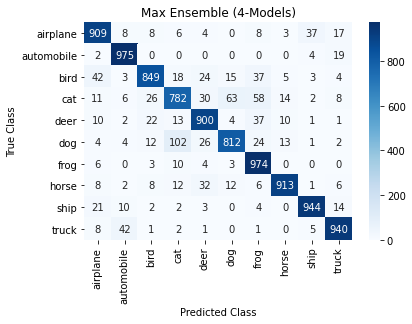

In [8]:
print("**********Accuracy**********\n\n", accuracy_score(y_true_class, ensemble) * 100, "%")
print("\n\n**********Classification Report***********\n\n", classification_report(y_true_class, ensemble))
print("\n\n**********Confusion Matrix***********\n\n")
sns.heatmap(confusion_matrix(y_true_class, ensemble), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Max Ensemble (4-Models)')
plt.show()

**Weighted Average Voting Ensemble of 4 New Models**

In [9]:
ensemble = []
i = 0
for i in range(len(y_pred_class_seq)):
  temp = list(map(sum, zip(y_pred_seq[i]*0.33, y_pred_res[i]*0.17, y_pred_squ[i]*0.17, y_pred_dep[i]*0.33)))
  ensemble.append(temp.index(max(temp)))

**********Accuracy**********

 90.97 %


**********Classification Report***********

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1000
           1       0.95      0.97      0.96      1000
           2       0.93      0.85      0.89      1000
           3       0.87      0.79      0.83      1000
           4       0.89      0.91      0.90      1000
           5       0.91      0.82      0.87      1000
           6       0.83      0.98      0.90      1000
           7       0.95      0.94      0.95      1000
           8       0.94      0.96      0.95      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**********Confusion Matrix***********




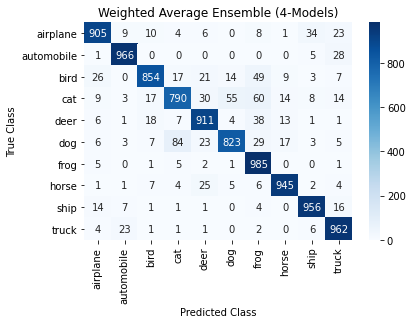

In [10]:
print("**********Accuracy**********\n\n", accuracy_score(y_true_class, ensemble) * 100, "%")
print("\n\n**********Classification Report***********\n\n", classification_report(y_true_class, ensemble))
print("\n\n**********Confusion Matrix***********\n\n")
sns.heatmap(confusion_matrix(y_true_class, ensemble), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Weighted Average Ensemble (4-Models)')
plt.show()

**Max Voting Ensemble of 4 New + 4 Old Models**

In [11]:
ensemble = []
i = 0
for i in range(len(y_pred_class_seq)):
  temp = [0,0,0,0,0,0,0,0,0,0]
  temp[y_pred_class_seq[i]] += 1
  temp[y_pred_class_res[i]] += 1
  temp[y_pred_class_squ[i]] += 1
  temp[y_pred_class_dep[i]] += 1
  temp[y_pred_class_sqn[i]] += 1
  temp[y_pred_class_inc[i]] += 1
  temp[y_pred_class_den[i]] += 1
  temp[y_pred_class_wid[i]] += 1
  ensemble.append(temp.index(max(temp)))

**********Accuracy**********

 91.07 %


**********Classification Report***********

               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1000
           1       0.94      0.97      0.95      1000
           2       0.88      0.89      0.88      1000
           3       0.85      0.79      0.82      1000
           4       0.90      0.91      0.91      1000
           5       0.88      0.84      0.86      1000
           6       0.90      0.96      0.93      1000
           7       0.96      0.94      0.95      1000
           8       0.96      0.95      0.95      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**********Confusion Matrix***********




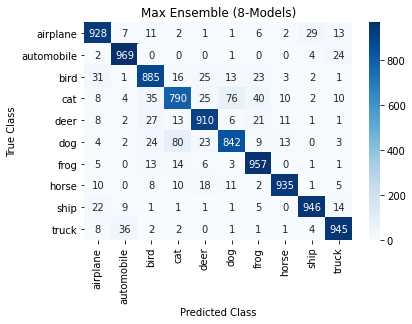

In [12]:
print("**********Accuracy**********\n\n", accuracy_score(y_true_class, ensemble) * 100, "%")
print("\n\n**********Classification Report***********\n\n", classification_report(y_true_class, ensemble))
print("\n\n**********Confusion Matrix***********\n\n")
sns.heatmap(confusion_matrix(y_true_class, ensemble), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Max Ensemble (8-Models)')
plt.show()

**Weighted Average Voting Ensemble of 4 New + 4 Old Models**

In [13]:
ensemble = []
i = 0
for i in range(len(y_pred_class_seq)):
  temp = list(map(sum, zip(y_pred_seq[i]*0.20, y_pred_res[i]*0.05, y_pred_squ[i]*0.05, y_pred_dep[i]*0.20, y_pred_sqn[i]*0.20, y_pred_inc[i]*0.05, y_pred_den[i]*0.05, y_pred_wid[i]*0.20)))
  ensemble.append(temp.index(max(temp)))

**********Accuracy**********

 91.55 %


**********Classification Report***********

               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1000
           1       0.95      0.97      0.96      1000
           2       0.91      0.88      0.89      1000
           3       0.86      0.80      0.83      1000
           4       0.90      0.93      0.91      1000
           5       0.90      0.83      0.87      1000
           6       0.89      0.97      0.93      1000
           7       0.94      0.95      0.94      1000
           8       0.95      0.95      0.95      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000



**********Confusion Matrix***********




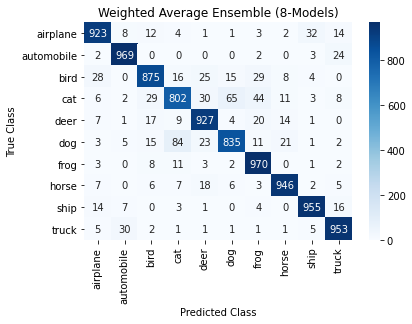

In [14]:
print("**********Accuracy**********\n\n", accuracy_score(y_true_class, ensemble) * 100, "%")
print("\n\n**********Classification Report***********\n\n", classification_report(y_true_class, ensemble))
print("\n\n**********Confusion Matrix***********\n\n")
sns.heatmap(confusion_matrix(y_true_class, ensemble), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Weighted Average Ensemble (8-Models)')
plt.show()